# EDA on Baltimore 911 Police Calls Data

### Data available by year at [Baltimore Open Data](https://data.baltimorecity.gov/) 
_______________________________________________________________________________________________________

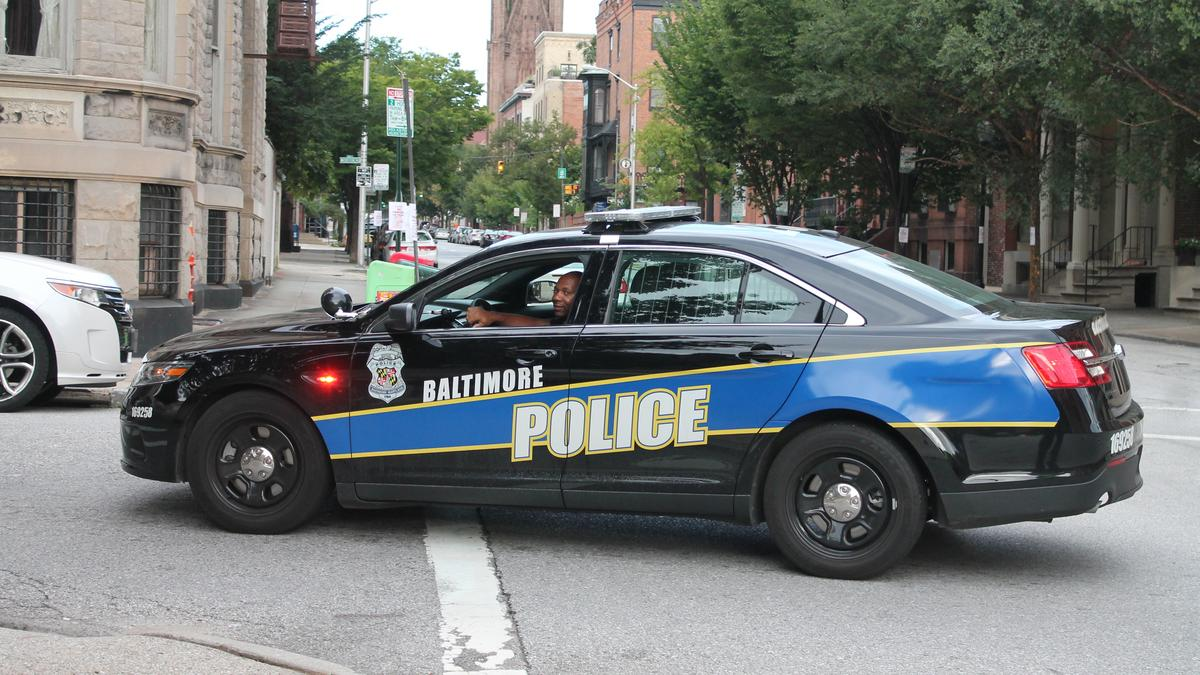

## Import the necessary packages
___________________________________________________________________________________

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Read in the Data
________________________________________________

In [2]:
# load in data frames
df_2017 = pd.read_csv('911_Calls_For_Service_2017.csv')
df_2018 = pd.read_csv('911_Calls_For_Service_2018.csv')
df_2019 = pd.read_csv('911_Calls_For_Service_2019.csv')
df_2020 = pd.read_csv('911_Calls_For_Service_2020.csv')

In [3]:
# merge into single data frame
# merge into single q4 dataframe
df_911 = pd.concat([df_2017,df_2018,df_2019,df_2020], axis=0)
df_911.head()

,OBJECTID,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,ZIPCode
0,1,1600347,1201020A597412C0,2017/07/22 23:06:00,Non-Emergency,CD,PRKG COMPLAINT,P172032931,0 S EUTAW ST,0 S EUTAW ST BALTIMORE MD,Downtown,Central,111.0,11.0,D7,Downtown/Seton Hill,Census Tract 401,NaN,21201.0
1,2,1571399,1201020A59816AC0,2017/08/02 02:00:59,Medium,WD,SICK CASE,P172140193,1600 N WOODYEAR ST,1600 N WOODYEAR ST BALTIMORE MD,Sandtown-Winchester,Western,742.0,7.0,D8,Sandtown-Winchester/Harlem Park,Census Tract 1501,Western,21217.0
2,3,1571389,1201020A59816C88,2017/08/02 02:09:00,High,WD,DOA / NONBREATHI,P172140208,1100 N BENTALOU ST,1100 N BENTALOU ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,NaN,21216.0
3,4,1571360,1201020A598170DD,2017/08/02 02:26:59,High,NE,RA POLICE,P172140240,SINCLAIR LN/BELAIR RD,SINCLAIR LN and BELAIR RD BALTIMORE MD,South Clifton Park,Eastern,331.0,12.0,D5,Clifton-Berea,Census Tract 801.02,NaN,21213.0
4,5,1560052,1201020A59868AB3,2017/08/05 23:19:00,High,NW,RA POLICE,P172172966,4100 RIDGEWOOD AV,4100 RIDGEWOOD AV BALTIMORE MD,West Arlington,Northwestern,621.0,6.0,D1,Dorchester/Ashburton,Census Tract 1510,NaN,21215.0


In [4]:
df_911.shape

(4923669, 19)

In [5]:
df_911.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4923669 entries, 0 to 1465129
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   OBJECTID                     int64  
 1   recordId                     int64  
 2   callKey                      object 
 3   callDateTime                 object 
 4   priority                     object 
 5   district                     object 
 6   description                  object 
 7   callNumber                   object 
 8   incidentLocation             object 
 9   location                     object 
 10  Neighborhood                 object 
 11  PoliceDistrict               object 
 12  PolicePost                   float64
 13  CouncilDistrict              float64
 14  SheriffDistricts             object 
 15  Community_Statistical_Areas  object 
 16  Census_Tracts                object 
 17  VRIZones                     object 
 18  ZIPCode                      float64
dtype

## Data Cleaning 
____________________________________________________

#### Cleaning Missing Values 

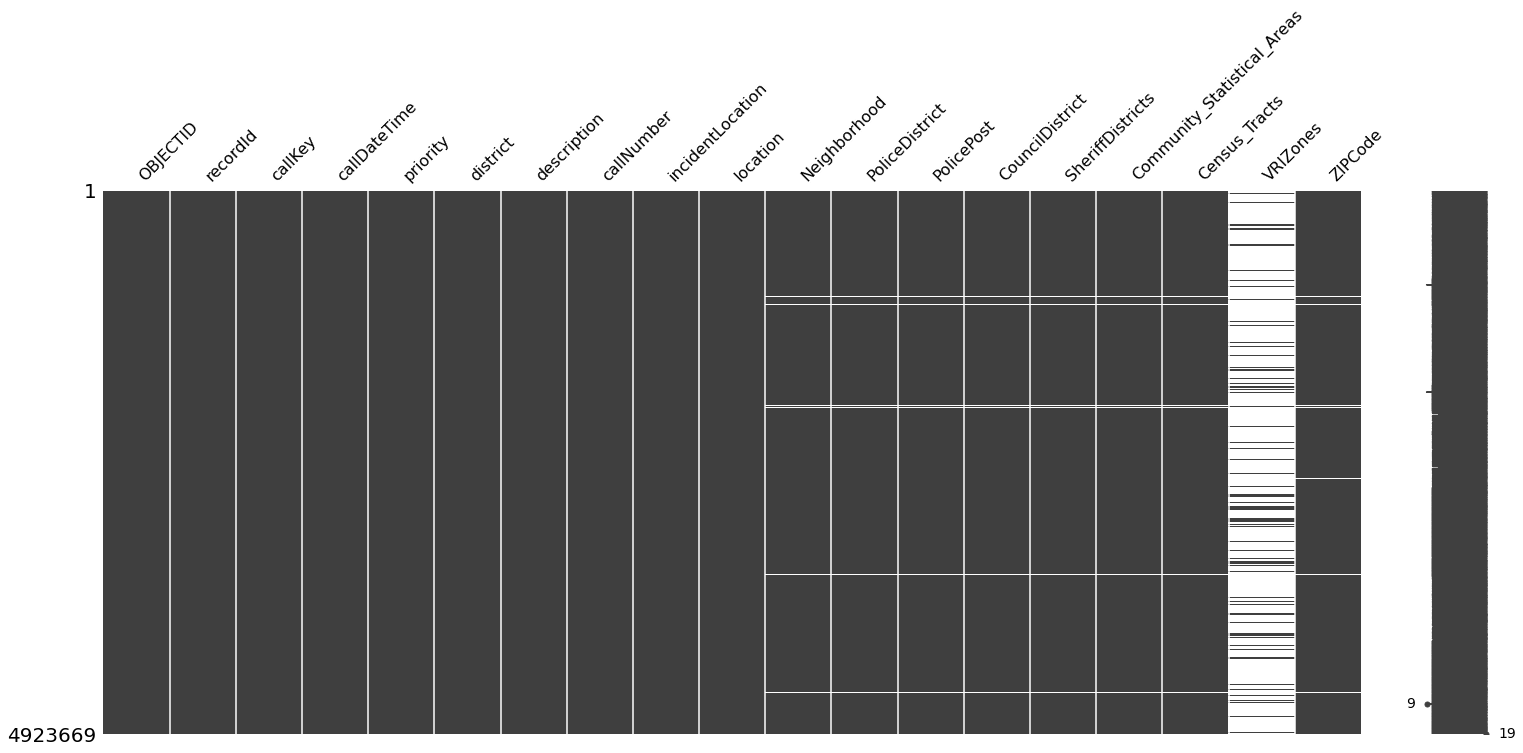

In [6]:
msno.matrix(df_911);

In [7]:
df_911.drop('VRIZones',axis = 1, inplace = True)

In [8]:
# as there is such a vast amount of data, dropping na values should have no impact
df_911.dropna(inplace=True)

In [9]:
df_911.head()

,OBJECTID,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode
0,1,1600347,1201020A597412C0,2017/07/22 23:06:00,Non-Emergency,CD,PRKG COMPLAINT,P172032931,0 S EUTAW ST,0 S EUTAW ST BALTIMORE MD,Downtown,Central,111.0,11.0,D7,Downtown/Seton Hill,Census Tract 401,21201.0
1,2,1571399,1201020A59816AC0,2017/08/02 02:00:59,Medium,WD,SICK CASE,P172140193,1600 N WOODYEAR ST,1600 N WOODYEAR ST BALTIMORE MD,Sandtown-Winchester,Western,742.0,7.0,D8,Sandtown-Winchester/Harlem Park,Census Tract 1501,21217.0
2,3,1571389,1201020A59816C88,2017/08/02 02:09:00,High,WD,DOA / NONBREATHI,P172140208,1100 N BENTALOU ST,1100 N BENTALOU ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,21216.0
3,4,1571360,1201020A598170DD,2017/08/02 02:26:59,High,NE,RA POLICE,P172140240,SINCLAIR LN/BELAIR RD,SINCLAIR LN and BELAIR RD BALTIMORE MD,South Clifton Park,Eastern,331.0,12.0,D5,Clifton-Berea,Census Tract 801.02,21213.0
4,5,1560052,1201020A59868AB3,2017/08/05 23:19:00,High,NW,RA POLICE,P172172966,4100 RIDGEWOOD AV,4100 RIDGEWOOD AV BALTIMORE MD,West Arlington,Northwestern,621.0,6.0,D1,Dorchester/Ashburton,Census Tract 1510,21215.0


#### Cleaning Date and Time Data

In [10]:
df_911.callDateTime = pd.to_datetime(df_911.callDateTime)
df_911.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4853171 entries, 0 to 1465129
Data columns (total 18 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   OBJECTID                     int64         
 1   recordId                     int64         
 2   callKey                      object        
 3   callDateTime                 datetime64[ns]
 4   priority                     object        
 5   district                     object        
 6   description                  object        
 7   callNumber                   object        
 8   incidentLocation             object        
 9   location                     object        
 10  Neighborhood                 object        
 11  PoliceDistrict               object        
 12  PolicePost                   float64       
 13  CouncilDistrict              float64       
 14  SheriffDistricts             object        
 15  Community_Statistical_Areas  object        
 16  

In [11]:
# adding hour, day, month and year columns
df_911['hour'] = df_911.callDateTime.apply(lambda x:x.hour)
df_911['month'] = df_911.callDateTime.apply(lambda x:x.month)
df_911['day'] = df_911.callDateTime.apply(lambda x:x.dayofweek)
df_911['year']= df_911.callDateTime.apply(lambda x:x.year)

In [12]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_911['day']=df_911.day.map(dmap)

In [13]:
df_911.month.unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

In [14]:
df_911.head()

,OBJECTID,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,...,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode,hour,month,day,year
0,1,1600347,1201020A597412C0,2017-07-22 23:06:00,Non-Emergency,CD,PRKG COMPLAINT,P172032931,0 S EUTAW ST,0 S EUTAW ST BALTIMORE MD,...,111.0,11.0,D7,Downtown/Seton Hill,Census Tract 401,21201.0,23,7,Sat,2017
1,2,1571399,1201020A59816AC0,2017-08-02 02:00:59,Medium,WD,SICK CASE,P172140193,1600 N WOODYEAR ST,1600 N WOODYEAR ST BALTIMORE MD,...,742.0,7.0,D8,Sandtown-Winchester/Harlem Park,Census Tract 1501,21217.0,2,8,Wed,2017
2,3,1571389,1201020A59816C88,2017-08-02 02:09:00,High,WD,DOA / NONBREATHI,P172140208,1100 N BENTALOU ST,1100 N BENTALOU ST BALTIMORE MD,...,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,21216.0,2,8,Wed,2017
3,4,1571360,1201020A598170DD,2017-08-02 02:26:59,High,NE,RA POLICE,P172140240,SINCLAIR LN/BELAIR RD,SINCLAIR LN and BELAIR RD BALTIMORE MD,...,331.0,12.0,D5,Clifton-Berea,Census Tract 801.02,21213.0,2,8,Wed,2017
4,5,1560052,1201020A59868AB3,2017-08-05 23:19:00,High,NW,RA POLICE,P172172966,4100 RIDGEWOOD AV,4100 RIDGEWOOD AV BALTIMORE MD,...,621.0,6.0,D1,Dorchester/Ashburton,Census Tract 1510,21215.0,23,8,Sat,2017


#### Remove Unnecessary Columns

In [15]:
# drop
df_911.drop(['OBJECTID','callKey','callNumber'],axis = 1, inplace = True)
df_911.head()

,recordId,callDateTime,priority,district,description,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode,hour,month,day,year
0,1600347,2017-07-22 23:06:00,Non-Emergency,CD,PRKG COMPLAINT,0 S EUTAW ST,0 S EUTAW ST BALTIMORE MD,Downtown,Central,111.0,11.0,D7,Downtown/Seton Hill,Census Tract 401,21201.0,23,7,Sat,2017
1,1571399,2017-08-02 02:00:59,Medium,WD,SICK CASE,1600 N WOODYEAR ST,1600 N WOODYEAR ST BALTIMORE MD,Sandtown-Winchester,Western,742.0,7.0,D8,Sandtown-Winchester/Harlem Park,Census Tract 1501,21217.0,2,8,Wed,2017
2,1571389,2017-08-02 02:09:00,High,WD,DOA / NONBREATHI,1100 N BENTALOU ST,1100 N BENTALOU ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,21216.0,2,8,Wed,2017
3,1571360,2017-08-02 02:26:59,High,NE,RA POLICE,SINCLAIR LN/BELAIR RD,SINCLAIR LN and BELAIR RD BALTIMORE MD,South Clifton Park,Eastern,331.0,12.0,D5,Clifton-Berea,Census Tract 801.02,21213.0,2,8,Wed,2017
4,1560052,2017-08-05 23:19:00,High,NW,RA POLICE,4100 RIDGEWOOD AV,4100 RIDGEWOOD AV BALTIMORE MD,West Arlington,Northwestern,621.0,6.0,D1,Dorchester/Ashburton,Census Tract 1510,21215.0,23,8,Sat,2017


In [17]:
df_911.shape

(4853171, 19)

In [19]:
df_911.head()

,recordId,callDateTime,priority,district,description,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode,hour,month,day,year
0,1600347,2017-07-22 23:06:00,Non-Emergency,CD,PRKG COMPLAINT,0 S EUTAW ST,0 S EUTAW ST BALTIMORE MD,Downtown,Central,111.0,11.0,D7,Downtown/Seton Hill,Census Tract 401,21201.0,23,7,Sat,2017
1,1571399,2017-08-02 02:00:59,Medium,WD,SICK CASE,1600 N WOODYEAR ST,1600 N WOODYEAR ST BALTIMORE MD,Sandtown-Winchester,Western,742.0,7.0,D8,Sandtown-Winchester/Harlem Park,Census Tract 1501,21217.0,2,8,Wed,2017
2,1571389,2017-08-02 02:09:00,High,WD,DOA / NONBREATHI,1100 N BENTALOU ST,1100 N BENTALOU ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,21216.0,2,8,Wed,2017
3,1571360,2017-08-02 02:26:59,High,NE,RA POLICE,SINCLAIR LN/BELAIR RD,SINCLAIR LN and BELAIR RD BALTIMORE MD,South Clifton Park,Eastern,331.0,12.0,D5,Clifton-Berea,Census Tract 801.02,21213.0,2,8,Wed,2017
4,1560052,2017-08-05 23:19:00,High,NW,RA POLICE,4100 RIDGEWOOD AV,4100 RIDGEWOOD AV BALTIMORE MD,West Arlington,Northwestern,621.0,6.0,D1,Dorchester/Ashburton,Census Tract 1510,21215.0,23,8,Sat,2017


## Exploratory Data Analysis
_________________________________________________

#### What is the most common day for calls?

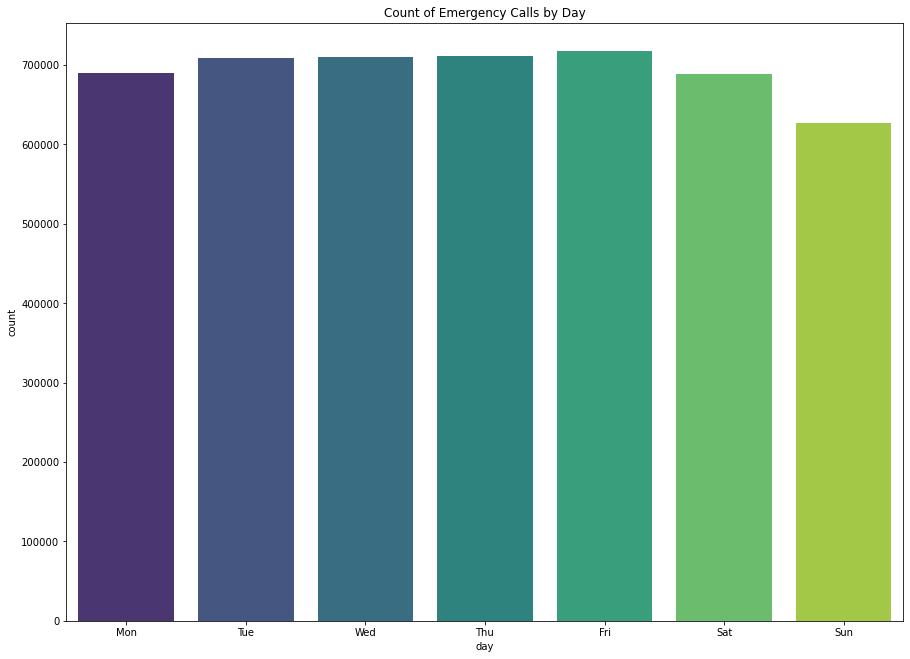

In [20]:
plt.figure(figsize = (15,11))
sns.countplot(x = 'day', data = df_911, palette='viridis',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Count of Emergency Calls by Day');

#### What are the call priorities per day?

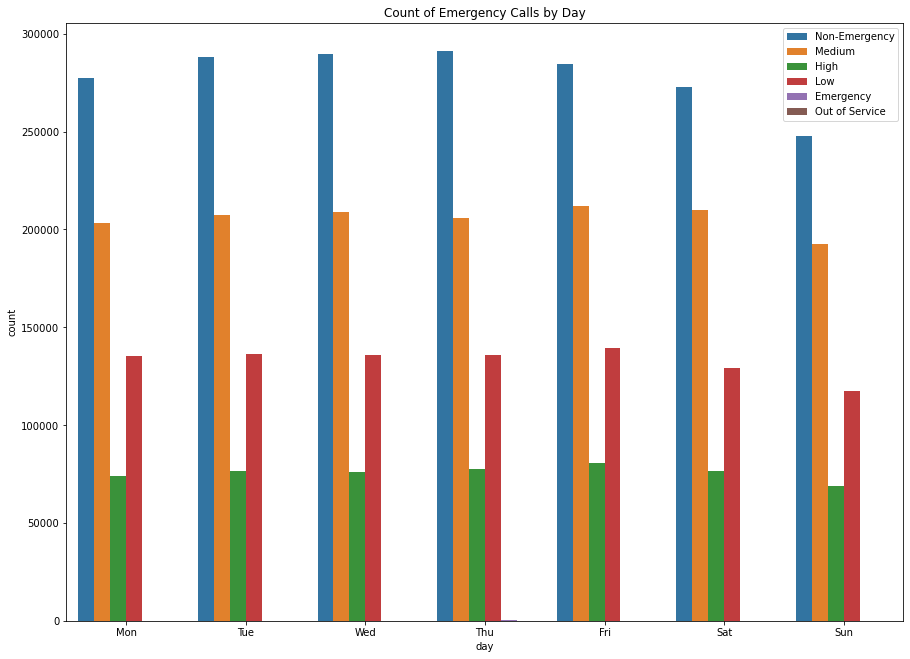

In [21]:
plt.figure(figsize = (15,11))
sns.countplot(x = 'day', data = df_911, hue = 'priority',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Count of Emergency Calls by Day')
plt.tight_layout
plt.legend(loc = 'best');

#### What are the busiest hours for 911 Police calls per day?

In [22]:
df_911.hour.unique()

array([23,  2,  1,  3, 21, 22,  4, 16, 11, 10,  9, 18,  7,  8, 12, 13, 15,
       19, 14, 17,  6, 20,  0,  5], dtype=int64)

In [23]:
hours = range(0,24)

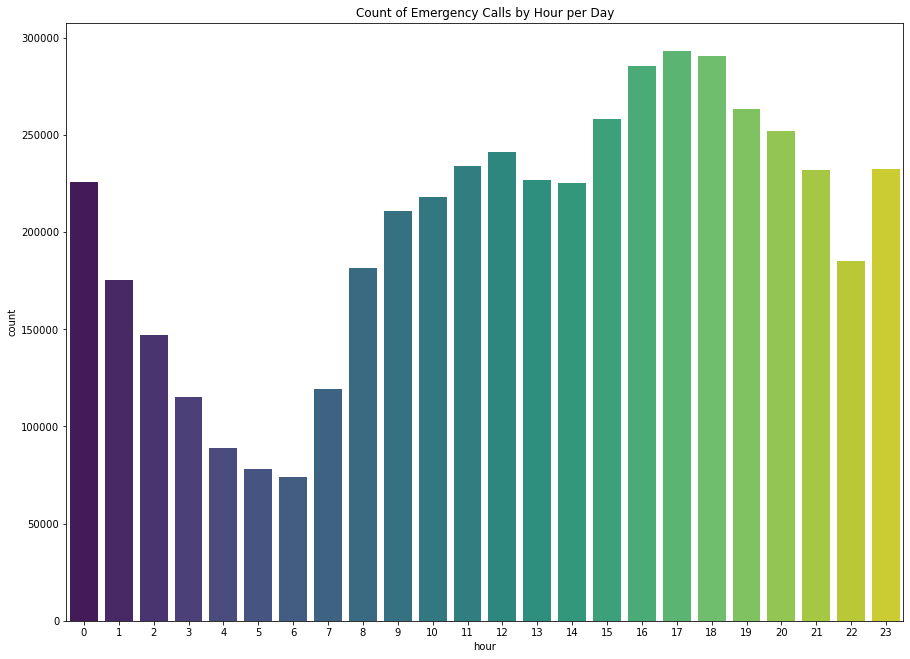

In [24]:
plt.figure(figsize = (15,11))
sns.countplot(x = 'hour', data = df_911, palette='viridis',order=hours)
plt.title('Count of Emergency Calls by Hour per Day');

Calls are lowest during the early hours of the morning.   
They are at their highest between 16:00 to 18:00, this is the time when people are commuting and leaving work. 

In [25]:
df_911[(df_911.hour >= 16) & (df_911.hour <= 18)].description.value_counts().head(10)

Business Check      119785
911/NO  VOICE        73679
DISORDERLY           64361
Traffic Stop         50298
AUTO ACCIDENT        36528
COMMUNITY ENGAGE     34139
COMMON ASSAULT       29028
Hot Spot Check       26293
Foot  Patrol         25069
NARCOTICS            18528
Name: description, dtype: int64

In [26]:
df_911[(df_911.hour >= 4) & (df_911.hour <= 6)].description.value_counts().head(10)

Business Check      51400
911/NO  VOICE       18545
DISORDERLY          16392
SILENT ALARM        11339
COMMUNITY ENGAGE     7800
Repo                 7532
Hot Spot Check       7105
Repairs/Service      7071
COMMON ASSAULT       6553
AUTO ACCIDENT        5848
Name: description, dtype: int64

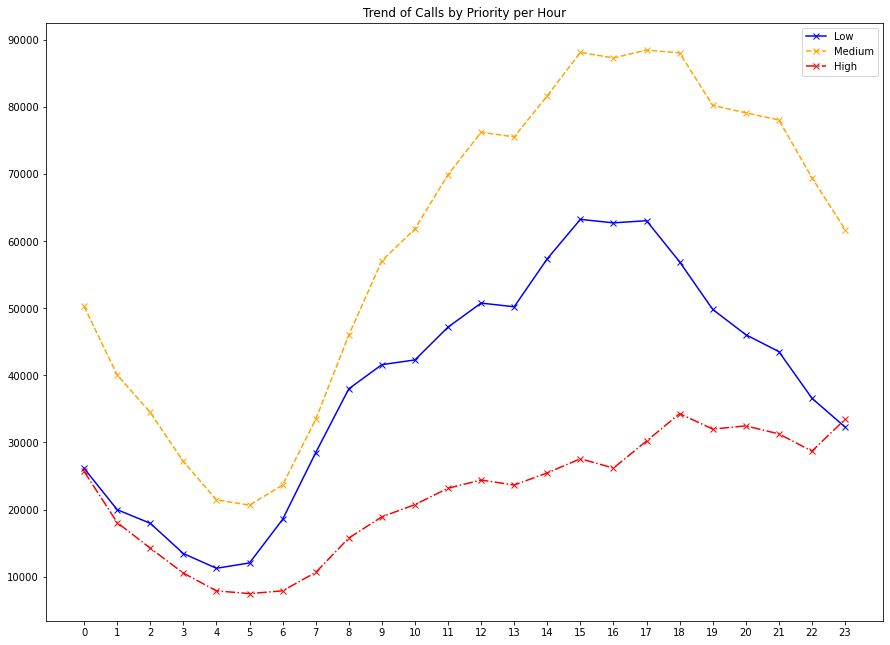

In [27]:
low = df_911[df_911.priority == "Low"].groupby('hour').count().priority
med = df_911[df_911.priority == "Medium"].groupby('hour').count().priority
high = df_911[df_911.priority == "High"].groupby('hour').count().priority

plt.figure(figsize=(15,11))
plt.plot(low.values, color = 'blue', marker = 'x')
plt.plot(med.values, color = 'orange', marker = 'x', linestyle = '--')
plt.plot(high.values, color = 'red', marker = 'x', linestyle = '-.')
plt.legend(labels = ['Low', 'Medium', 'High'])
plt.xticks(ticks = range(0,24))
plt.title('Trend of Calls by Priority per Hour');

#### What are the proportions of calls by priority?

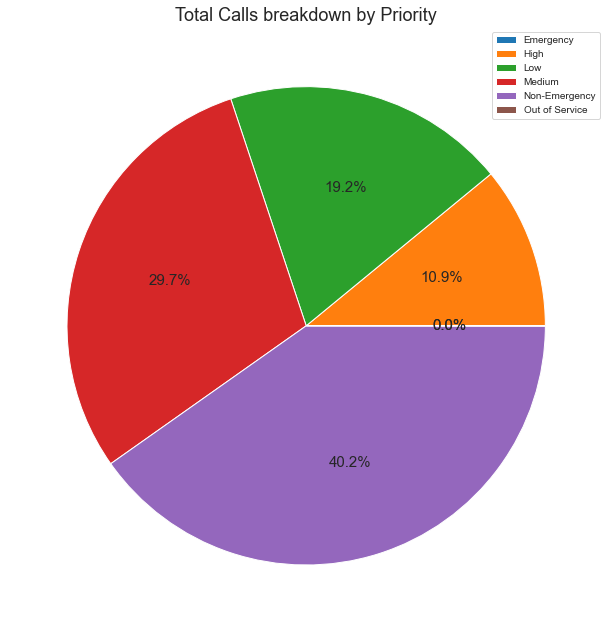

In [28]:
priority_count = df_911.groupby('priority')['priority'].count()
sns.set_style('white')
plt.figure(figsize=(15,11))
plt.title('Total Calls breakdown by Priority',fontsize = 18)
plt.pie(priority_count.values,autopct='%1.1f%%', textprops={'fontsize':15})
plt.legend(labels=priority_count.index,loc = 'best');

In [29]:
df_911[df_911.priority == 'Emergency'].description.value_counts().head(20)

ASSIST OFFICER      465
ASSIST FIRE DEPT    297
Immediate Inc       184
Traffic Pursuit       6
POSSIBLE              2
RA POLICE             1
LOUD MUSIC            1
Name: description, dtype: int64

In [30]:
df_911[df_911.priority == 'High'].description.value_counts().head(20)

Traffic Stop        130570
SILENT ALARM         67187
AUTO ACC/INJURY      43266
COMMON ASSAULT       36281
AGGRAV ASSAULT       31918
ARMED PERSON         31540
RA POLICE            22439
DISCHRG FIREARM      20112
FIRE                 16892
Field Interview      16042
OVERDOSE             15307
ROBBERY ARMED        13053
BURGLARY             12650
NONBREATHING / A     11033
SHOOTING              8669
ROBBERY UNARMED       7858
HOLDUP ALARM          6425
ShotSpot Alert        6036
AUDIBLE ALARM         4337
CUTTING               3728
Name: description, dtype: int64

In [31]:
df_911[df_911.priority == 'Medium'].description.value_counts().head(20)

DISORDERLY          354350
911/NO  VOICE       240170
COMMON ASSAULT      123976
FAMILY DISTURB       92603
NARCOTICSOutside     80847
NARCOTICS            78944
SILENT ALARM         59643
BURGLARY             58477
SUSPICIOUS PERS      40154
BEHAVIOR CRISIS      28879
MISSING PERSON       26396
Lab Request          23692
RA POLICE            22226
WANTED ON WARR       21033
NARCOTICS INSIDE     16185
AUTO THEFT           13209
NARCOTICS ONVIEW     10909
EXPART/PROT/PEAC     10754
Warrant Service      10268
UNFOUNDED            10064
Name: description, dtype: int64

In [32]:
df_911[df_911.priority == 'Low'].description.value_counts().head(20)

911/NO  VOICE       160959
AUTO ACCIDENT       153479
OTHER                79735
LARCENY              66881
INVESTIGATE          57283
HIT AND RUN          54231
DESTRUCT PROP        52191
LARCENY F/AUTO       38800
AUTO THEFT           21976
Transport            15295
SEE TEXT             10559
JUV DISTURBANCE      10275
CHECK WELL BEING     10150
WANTED ON WARR        8879
INVEST                8485
UNKNOWN TROUBLE       8377
SUSPICIOUS PERS       7855
RECOVERED VEH         7594
INTOXICATED PERS      7248
FALSE PRETENSE        7158
Name: description, dtype: int64

In [33]:
df_911[df_911.priority == 'Non-Emergency'].description.value_counts().head(20)

Business Check      764160
COMMUNITY ENGAGE    177821
Traffic Stop        163930
Hot Spot Check      149319
Foot  Patrol        118452
Repairs/Service     101238
Private Tow          45080
Other                35260
LOUD MUSIC           31017
FOLLOW UP            27113
Repo                 25884
Warrant Service      24419
INVESTIGATE AUTO     21921
Personal Relief      21754
PRKG COMPLAINT       20497
DIRECTED PATROL      19326
TOWED VEHICLE        17936
Lab Request          16707
SUPV COMPLAINT       13993
RECOVER PROPERTY     12637
Name: description, dtype: int64

#### What are the most common reasons for a 911 call?

Text(0.5, 1.0, 'Most common Call Reasons for Police Assistance')

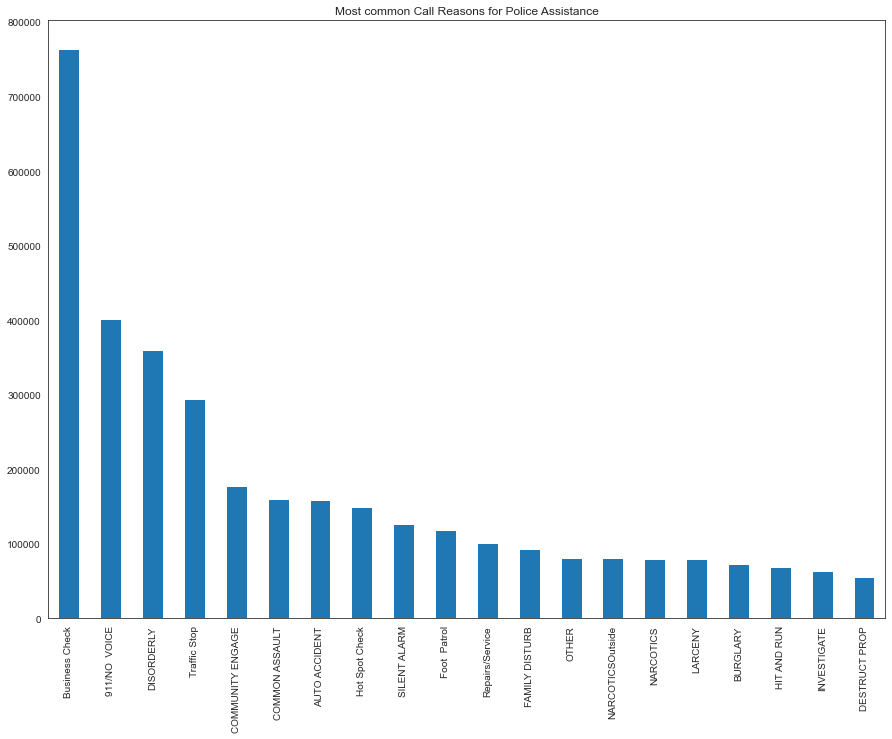

In [34]:
plt.figure(figsize = (15,11))
df_911.description.value_counts().head(20).plot(kind = 'bar')
plt.title('Most common Call Reasons for Police Assistance')

#### What is the Police District Responsible for the most calls?

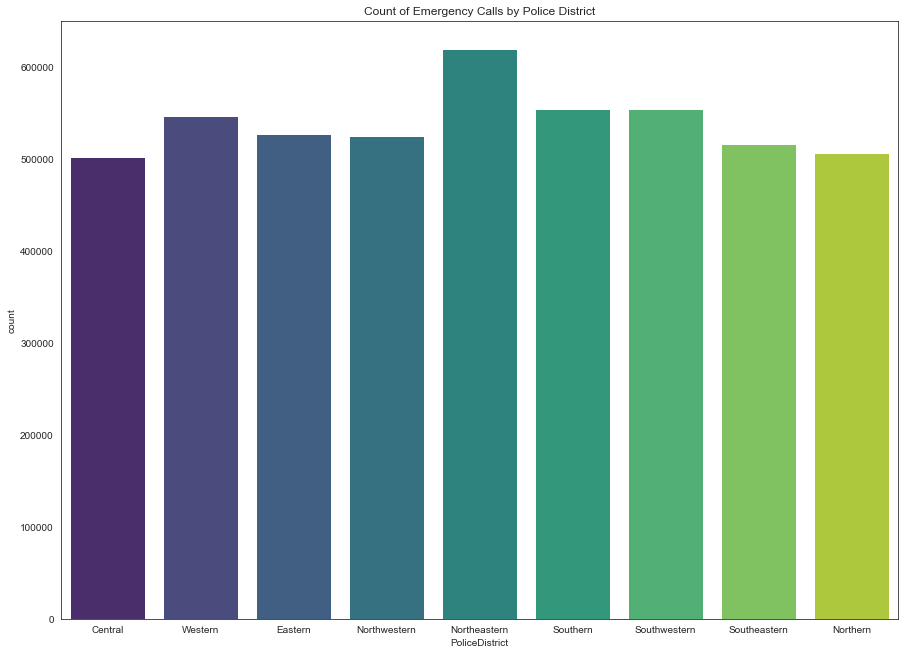

In [35]:
plt.figure(figsize = (15,11))
sns.countplot(x = 'PoliceDistrict', data = df_911, palette='viridis')
plt.title('Count of Emergency Calls by Police District');

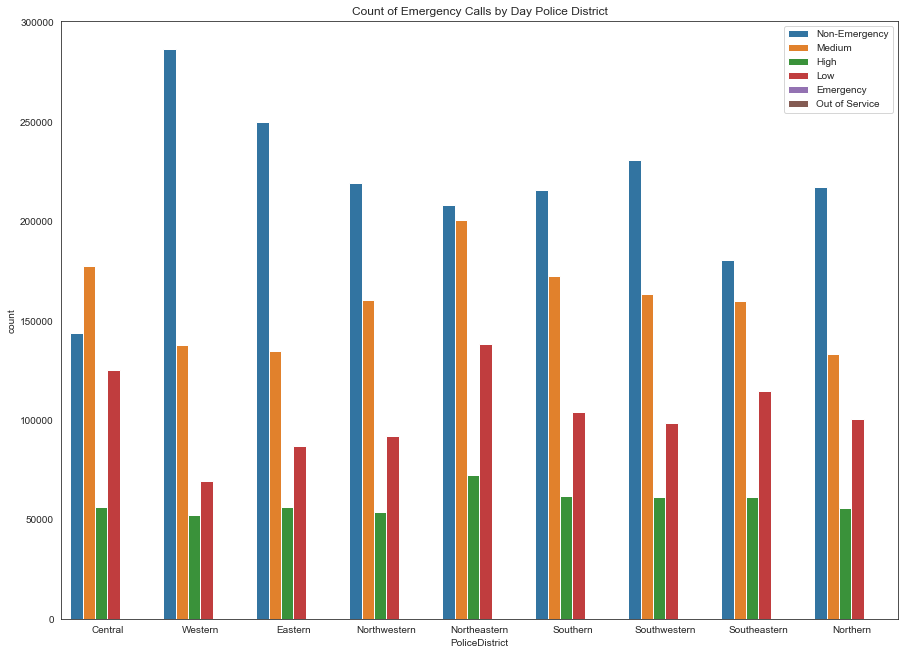

In [36]:
plt.figure(figsize = (15,11))
sns.countplot(x = 'PoliceDistrict', data = df_911, hue = 'priority')
plt.title('Count of Emergency Calls by Day Police District')
plt.tight_layout
plt.legend(loc = 'best');

#### What are the top 10 Neighbourhood where Incidents take place?

In [37]:
neighborhood = df_911.Neighborhood
neighborhood.value_counts()[:10]

Downtown                148505
Sandtown-Winchester     125605
Belair-Edison           106828
Frankford                99051
Penn-Fallsway            92750
Brooklyn                 87263
Carrollton Ridge         80412
Upton                    75100
Central Park Heights     69600
Penn North               59436
Name: Neighborhood, dtype: int64

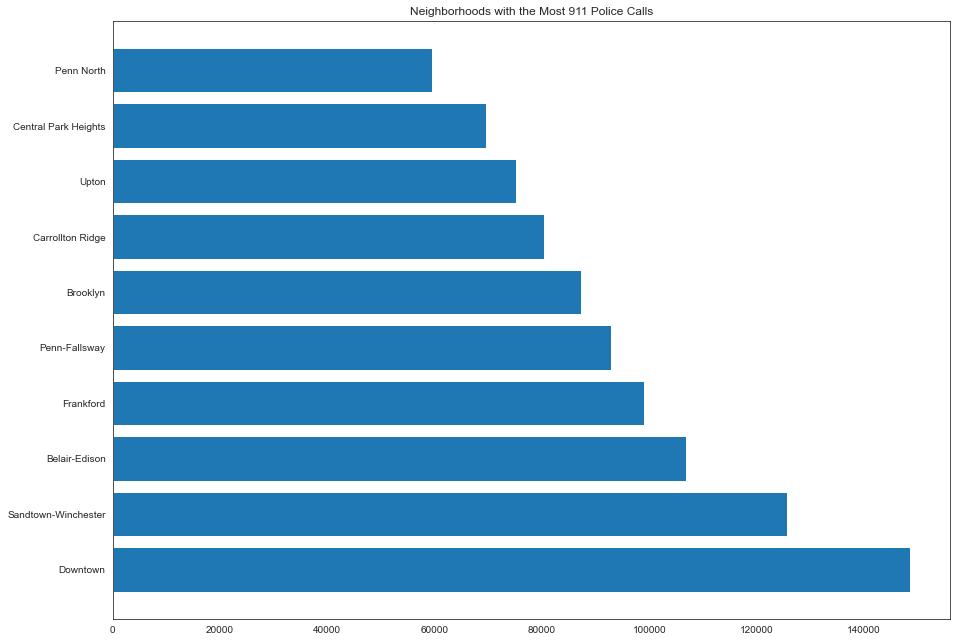

In [38]:
plt.figure(figsize = (15,11))
plt.barh(y = neighborhood.value_counts()[:10].index, width = neighborhood.value_counts()[:10].values)
plt.title("Neighborhoods with the Most 911 Police Calls");

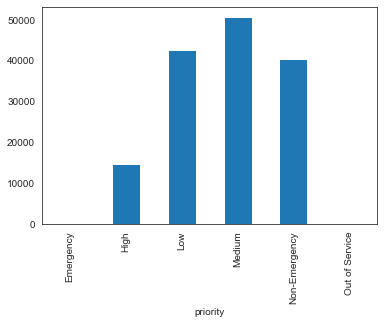

In [48]:
df_911[df_911.Neighborhood == 'Downtown'].groupby('priority').count().Neighborhood.plot(kind = 'bar');

#### How do calls trend during a year?

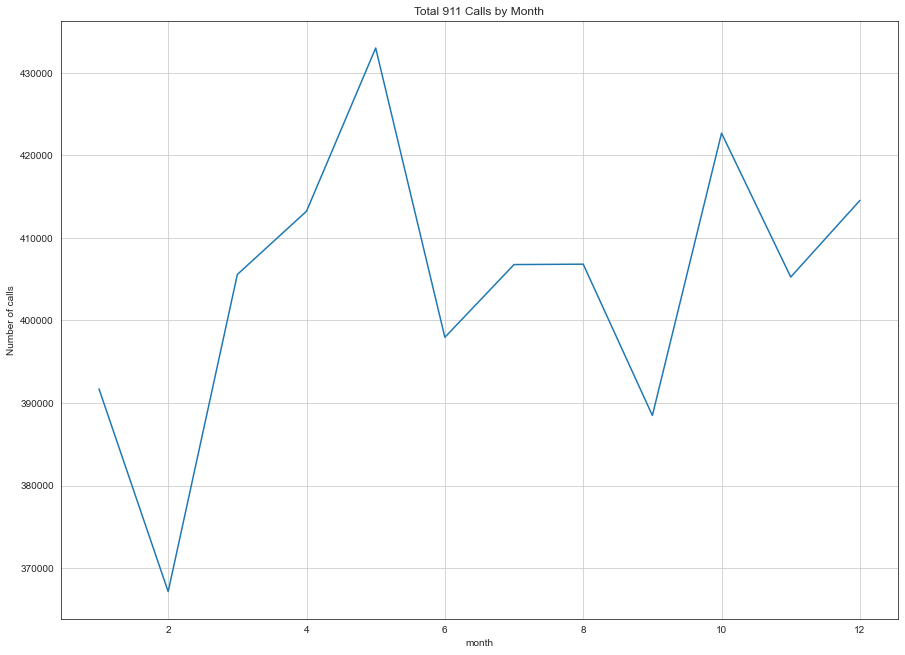

In [39]:
plt.figure(figsize=(15,11))
bymonth = df_911.groupby('month').count()
bymonth['description'].plot(grid=True)
plt.title('Total 911 Calls by Month')
plt.ylabel('Number of calls');

In [53]:
# find reasons for most calls in months 4 and 5
top_reasons = df_911[(df_911.month == 4) | (df_911.month == 5)].description.value_counts().head(10).index

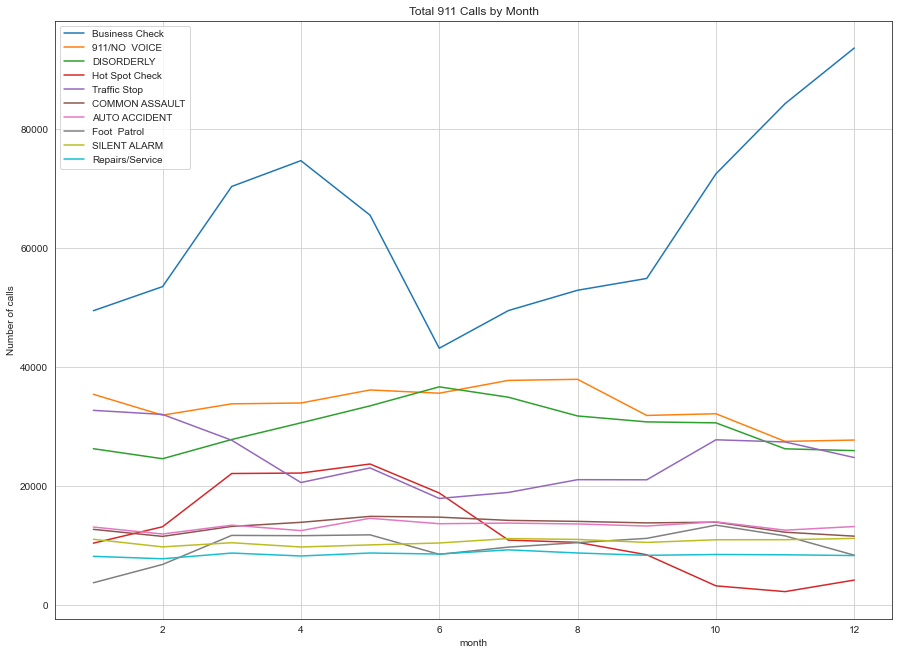

In [58]:
plt.figure(figsize=(15,11))

for i in top_reasons:
    bymonth = df_911[df_911.description == i].groupby('month').count()
    bymonth['description'].plot(grid=True)


plt.title('Total 911 Calls by Month')
plt.ylabel('Number of calls')
plt.legend(labels = top_reasons, loc = 'best');

Calls appear to increase in winter months.  
[Baltimore weather info](https://www.weather-us.com/en/maryland-usa/baltimore-climate#:~:text=The%20weather%20is%20characterized%20by,summers%20and%20cold%2C%20wet%20winters.&text=Summer%20comes%20to%20Baltimore%20from,days%20remain%20warm%20and%20pleasant.)

#### How have calls trended throughout the Years?

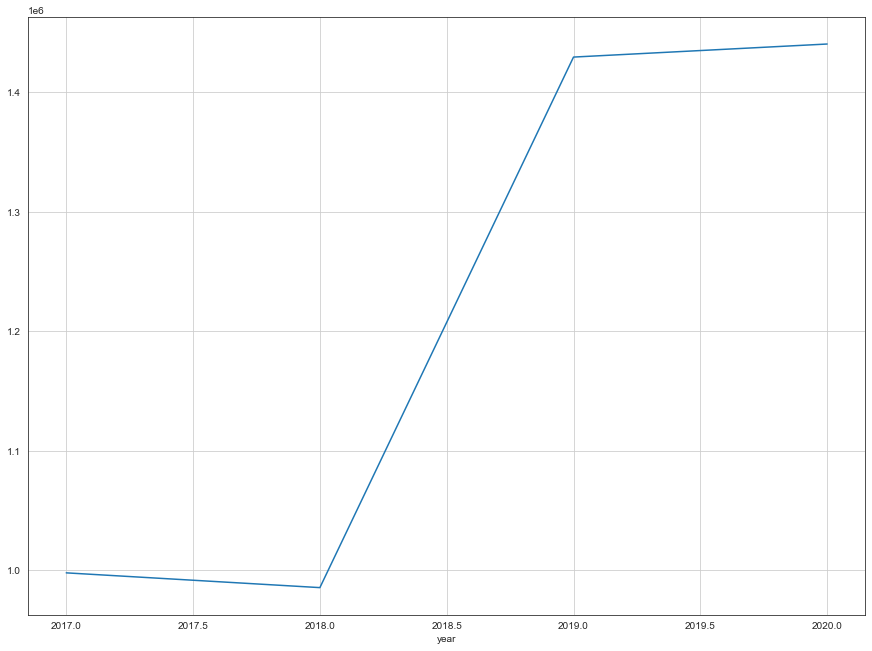

In [40]:
plt.figure(figsize=(15,11))
bymonth = df_911.groupby('year').count()
bymonth['description'].plot(grid=True);

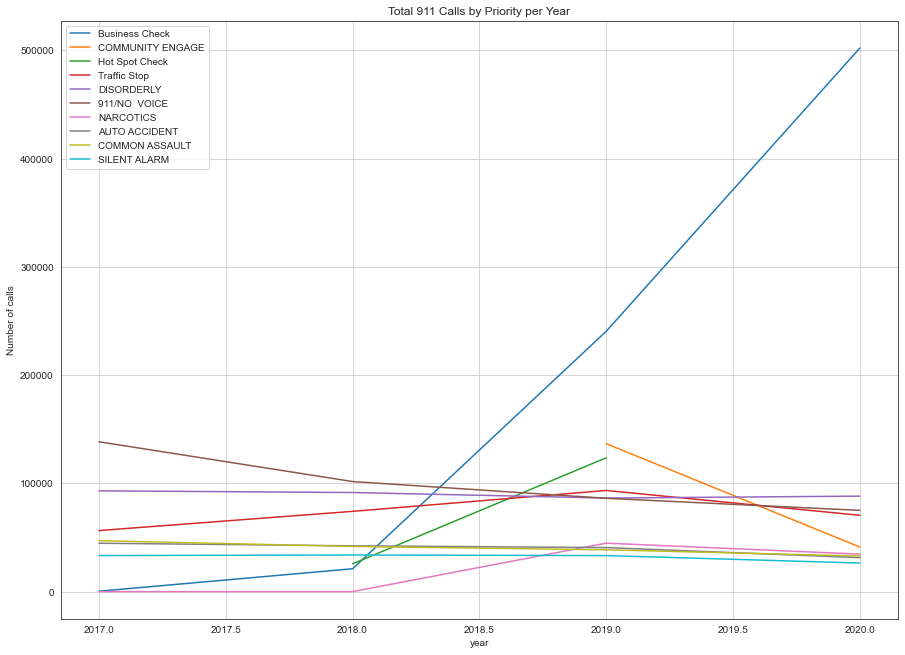

In [62]:
# find reasons for most calls in months 4 and 5
top_19_20_reasons =  df_911[(df_911.year == 2019) | (df_911.month == 2020)].description.value_counts().head(10).index


plt.figure(figsize=(15,11))

# loop through and plot top reasosn in 2019 and 2020 trends
for i in top_19_20_reasons:
    byyear = df_911[df_911.description == i].groupby('year').count()
    byyear['description'].plot(grid=True)

# add title, y-label and legend with best location
plt.title('Total 911 Calls by Priority per Year')
plt.ylabel('Number of calls')
plt.legend(labels = top_19_20_reasons, loc = 'best');

In [41]:
df_911[df_911.year == 2019].description.value_counts().head(20)

Business Check      240531
COMMUNITY ENGAGE    136654
Hot Spot Check      123635
Traffic Stop         93438
DISORDERLY           86445
911/NO  VOICE        86210
NARCOTICS            44767
AUTO ACCIDENT        40664
COMMON ASSAULT       38612
SILENT ALARM         33307
Repairs/Service      27393
FAMILY DISTURB       22204
OTHER                21199
LARCENY              20692
BURGLARY             17218
HIT AND RUN          16658
INVESTIGATE          15597
Foot  Patrol         13631
DESTRUCT PROP        13120
Private Tow          12603
Name: description, dtype: int64

In [42]:
df_911[df_911.year == 2018].description.value_counts().head(20)

911/NO  VOICE       101677
DISORDERLY           91540
Traffic Stop         74155
AUTO ACCIDENT        42311
COMMON ASSAULT       41736
NARCOTICSOutside     38191
SILENT ALARM         33816
Hot Spot Check       25684
FAMILY DISTURB       24104
Repairs/Service      22588
Business Check       21111
LARCENY              20819
OTHER                20140
BURGLARY             19501
HIT AND RUN          17378
INVESTIGATE          15932
DESTRUCT PROP        14012
SUSPICIOUS PERS      12740
Private Tow          11724
LARCENY F/AUTO       11708
Name: description, dtype: int64

In [43]:
df_911[df_911.year == 2017].description.value_counts().head(20)

911/NO  VOICE       138415
DISORDERLY           93101
Traffic Stop         56405
COMMON ASSAULT       47055
AUTO ACCIDENT        44699
NARCOTICSOutside     42649
SILENT ALARM         33327
FAMILY DISTURB       25324
BURGLARY             23074
LARCENY              22413
Repairs/Service      21402
OTHER                20520
HIT AND RUN          18767
INVESTIGATE          18460
DESTRUCT PROP        16125
SUSPICIOUS PERS      14372
Lab Request          13400
LARCENY F/AUTO       12173
Private Tow          12000
AUTO ACC/INJURY      11499
Name: description, dtype: int64

In [44]:
df_911[df_911.description == 'COMMUNITY ENGAGE'].year.value_counts()

2019    136654
2020     41167
Name: year, dtype: int64

_______________________________________________________________________________________________________________________________________________________________________________
